# Curse Of Dimensionality

## References 

- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html
- https://www.youtube.com/@kilianweinberger698

## Data Prep

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from scipy.spatial import minkowski_distance
from sklearn.datasets import make_classification

np.random.seed(8888)

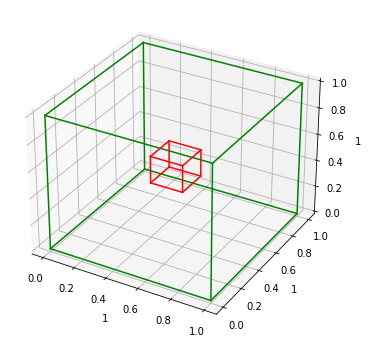

In [3]:
from itertools import product, combinations

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(132, projection='3d')
r = [0, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1] -  r[0]:
        ax.plot3D(*zip(s, e), color="green")

ax.set_xlabel('1')
ax.set_ylabel('1')
ax.set_zlabel('1')

l = [0.4, 0.6]

for s, e in combinations(np.array(list(product(l, l, l))), 2):
    if np.sum(np.abs(s-e)) == l[1] - l[0]:
        ax.plot3D(*zip(s, e), color="red")
plt.show()

<!-- axes = [1, 1, 1]

data = np.ones(axes)

l = data * 0.3


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# ax.voxels(data, alpha=1, facecolors='red', shade = True)
ax.voxels(l, alpha=0.6, facecolors='green', shade = True)

plt.show(); -->

Volume of d dimensional cube of edge l is $l^d$ ($l^3$ for 3D cube) and this cube contains k data points($R^d$ real data points d dimensional) `uniformly distributed` out of n.

\begin{align}
    l^d &\approx \frac{k}{n} \\
    l &\approx \big(\frac{k}{n} \big)^{\frac{1}{d}}
    \\
    \text{let } & k=10, n=1000 \\
    l &\approx \big( \frac{1}{100} \big)^{\frac{1}{d}}
\end{align}

In [4]:
n_samples = 1000
n_features = [2, 3, 10, 100, 1000, 10000]
distances = []
class0_distances = []
class1_distances = []

for i in n_features:
    
    X, y = make_classification(n_samples=n_samples, n_features=i, n_redundant=0, n_classes=2, class_sep=2,
                               n_clusters_per_class=1, random_state=0)
    
    sparse_matrix = np.random.randint(0, 2, (n_samples, i))
    
    # X = X * sparse_matrix
    
    class1_idxs = np.where(y == 1)[0]
    class0_idxs = np.where(y == 0)[0]
    min_len = min(class0_idxs.shape[0], class1_idxs.shape[0])

    center_point = np.zeros((1, X.shape[1])) # X.mean(axis=0) 
    class0_dist = minkowski_distance(center_point, X[class0_idxs], p=2)
    class1_dist = minkowski_distance(center_point, X[class1_idxs], p=2)
    
    class0_distances.append(class0_dist)
    class1_distances.append(class1_dist)
    
    random_idxs_1 = np.random.randint(0, min_len, size=500)
    random_idxs_2 = np.random.randint(0, min_len, size=500)
    
    distance = minkowski_distance(X[class0_idxs][random_idxs_1], X[class1_idxs][random_idxs_2], p=2)
    distances.append(distance)

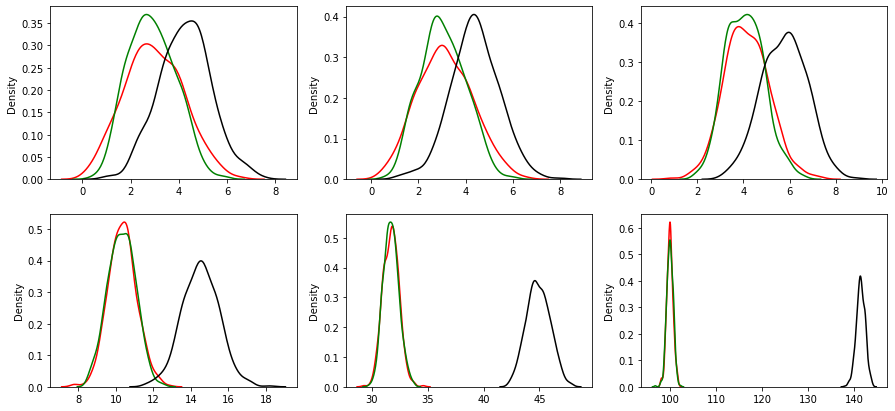

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()

for idx in range(len(n_features)):
    sns.kdeplot(class0_distances[idx], color='r', ax=ax[idx])
    sns.kdeplot(class1_distances[idx], color='g', ax=ax[idx])
    sns.kdeplot(distances[idx], color='k', ax=ax[idx])
    
plt.show()